In [ ]:
# %load ../modules/utils.py
import matplotlib.pyplot as plt

def plot_spectrogram(spectrogram, title, x_label, y_label, figsize=(12, 5)):
    ''' Plot spectrogram '''
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.imshow(spectrogram.T, cmap=plt.cm.jet, aspect='auto')
    plt.colorbar()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    ax = plt.gca()
    ax.invert_yaxis()

In [ ]:
# %load ../modules/audio_processing.py
from python_speech_features import mfcc
from python_speech_features import logfbank
from python_speech_features import delta
import scipy.io.wavfile as wav
import sox

def get_features(source, destination, n_delta=1, numcep=13):
    '''' Transform original sound file and calculate features. '''
    # transform original file
    tfm = sox.Transformer()
    tfm.set_output_format(rate=16000)
    tfm.build(source, destination)

    # calulate features
    rate,sig = wav.read(destination)
    mfcc_feat = mfcc(sig, rate)
    fbank_feat = logfbank(sig, rate, numcep=numcep)
    if n_delta >= 1:
        d_mfcc_feat = delta(mfcc_feat, 2)
    if n_delta == 2:
        d_mfcc_feat2 = delta(d_mfcc_feat, 2)
        d_mfcc_feat = np.concatenate((d_mfcc_feat, d_mfcc_feat2), axis=1)
    complete_mfcc = np.concatenate((mfcc_feat, d_mfcc_feat), axis=1)
    return complete_mfcc

This install of SoX cannot process .WAV files.
output_file: sample.wav already exists and will be overwritten on build


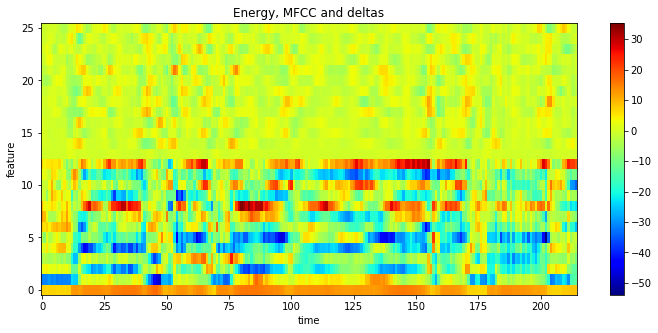

In [7]:
features = get_features('../data/FCJF0/SA2.WAV', 'sample.wav', n_delta=1)
plot_spectrogram(features, 'Energy, MFCC and deltas', 'time', 'feature')